### Starbucks

* An advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at 10 USD. 
* It costs 0.15 USD to send out each promotion

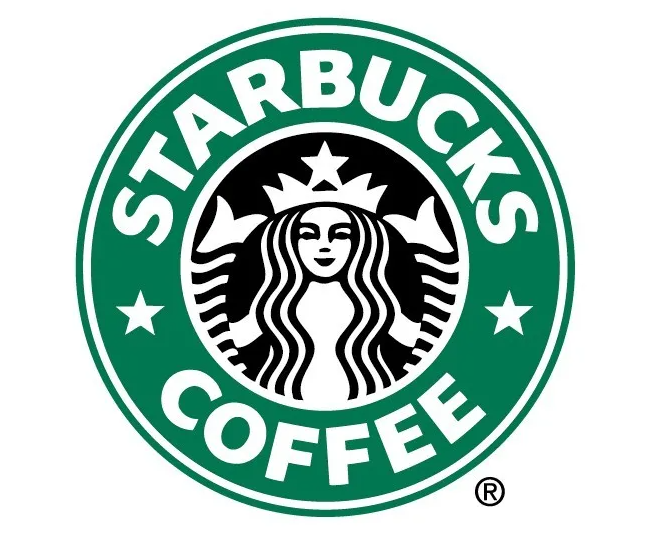

In [1]:
from IPython.display import Image, display
display(Image(filename="starbucks.png", width = 400, height=400))

##### Part 1: Analysis on the results of the experiment and identify the effect of the promotion on product purchase and Net Incremental Revenue.
  * Simple Analysis to Calculate Whether or Not Cost of Promotion Was Worth It
  * Advanced Analysis to Calculate Whether or Not Cost of Promotion Was Worth It
  * What IRR and NIR results could mean.
  * Understanding Discrepancies Between Simple and Advanced Analysis.
  * 
Determing if the promotion had a statistically significant effect on purchase rate
  * Confidence Intervals for IRR and NIR
  * Calculating the Highest Loss Per Customer Feature

#####  Part 2: Build a model to select the best customers to target that maximizes the Incremental Response Rate and Net Incremental Revenue

In [3]:
#Standard libraries for data analysis:
# import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split

from scipy.stats import norm, skew
# import statsmodels.api as sm
import seaborn as sns

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

pd.set_option('display.max_columns', None)

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_15936\222781493.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### Analyze the results of the experiment and identify the effect of the promotion on product purchase and Net Incremental Revenue.

##### Incremental Response Rate (IRR)
* IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. 
* Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (treatment) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (control).


##### Net Incremental Revenue (NIR)
* NIR depicts how much is made (or lost) by sending out the promotion. 
* Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

In [4]:
df = pd.read_csv('Training.csv')
df.head()

# Promotion – Indicates if the customer was part of treatment or control
# Purchase – Indicates if the customer purchased the product
# ID – Customer ID
# V1 to V7 – features of the customer

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044331,-0.385883,1,1,2,2


In [5]:
# Summary statistics
df.describe()

,ID,purchase,V1,V2,V3,V4,V5,V6,V7
count,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000
mean,62970.972413,0.012303,1.500662,29.973600,0.000190,1.679608,2.327643,2.502898,1.701694
std,36418.440539,0.110234,0.868234,5.010626,1.000485,0.466630,0.841167,1.117349,0.457517
min,1.000000,0.000000,0.000000,7.104007,-1.684550,1.000000,1.000000,1.000000,1.000000
25%,31467.250000,0.000000,1.000000,26.591501,-0.905350,1.000000,2.000000,2.000000,1.000000
50%,62827.500000,0.000000,2.000000,29.979744,-0.039572,2.000000,2.000000,3.000000,2.000000
75%,94438.750000,0.000000,2.000000,33.344593,0.826206,2.000000,3.000000,4.000000,2.000000
max,126184.000000,1.000000,3.000000,50.375913,1.691984,2.000000,4.000000,4.000000,2.000000


In [6]:
# Check for null values
# No null values.
print(df.isnull().sum())

ID           0
Promotion    0
purchase     0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
dtype: int64


<Axes: xlabel='purchase', ylabel='count'>

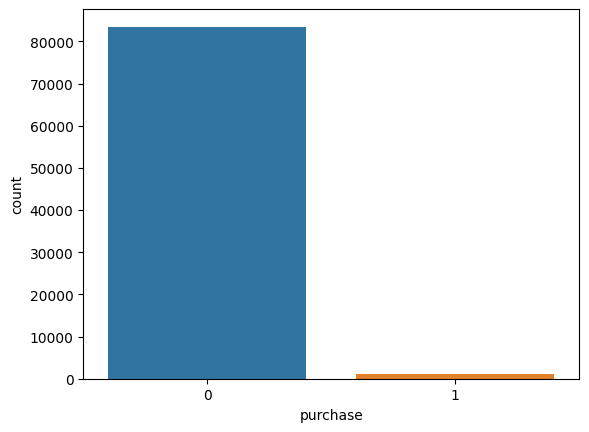

In [7]:
# Distribution of 'Purchase'
# 0 means no purchase and 1 means purchase

sns.countplot(data=df, x='purchase')

<Axes: xlabel='Promotion', ylabel='count'>

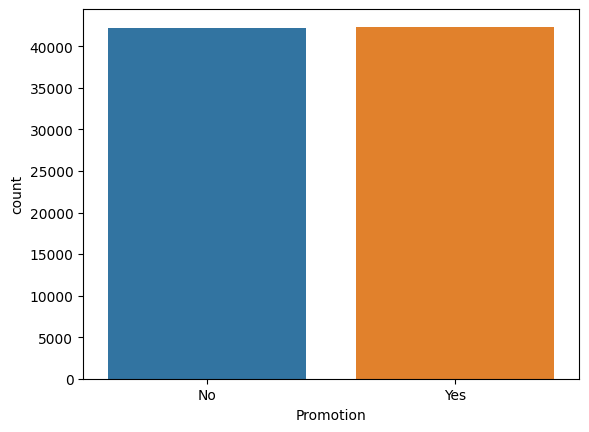

In [8]:
# Distribution of 'Promotion'

sns.countplot(data=df, x='Promotion')

### Part 1: 
#### Analysis on the results of the experiment and identify the effect of the promotion on product purchase and Net Incremental Revenue.

### Simple Analysis to Calculate Whether or Not Cost of Promotion Was Worth It

Limitations of Simple Analysis:
* Lack of Control Group Comparison: No insights into what would have happened without the promotion.
* No Insights into Customer Segments: Who should the promotions actually be sent to?
* No Long-term Perspective: No consideration of customer lifetime value.
* No Statistical Confidence: Results could be due to random chance.
* Strategic Objectives Not Considered: Other business objectives might exist aside from immediate profitability.

In [9]:
# Importing pandas for data manipulation
import pandas as pd

# Assuming df is your DataFrame with 'Promotion' and 'purchase' columns

# Calculate the number of customers targeted by the promotion
num_customers_targeted = df[df['Promotion'] == 'Yes'].shape[0]

# Calculate the cost of the promotion
total_cost_of_promotion = num_customers_targeted * 0.15

# Calculate the revenue generated from the promotion
revenue_from_promotion = df[(df['Promotion'] == 'Yes') & (df['purchase'] == 1)].shape[0] * 10

# Calculate the profit from the promotion
profit_from_promotion = revenue_from_promotion - total_cost_of_promotion

display(HTML(f"<b>Number of Customers Targeted:</b> {num_customers_targeted}"))
display(HTML(f"<b>Total Cost of Promotion:</b> ${total_cost_of_promotion}"))
display(HTML(f"<b>Total Revenue from Promotion:</b> ${revenue_from_promotion}"))
display(HTML(f"<b>Profit from Promotion:</b> ${profit_from_promotion}"))

### Advanced Analysis to Calculate Whether or Not Cost of Promotion Was Worth It

In [10]:
# Calculate metrics for control group
# For IRR
treatment_group = df[df['Promotion'] == 'Yes']
control_group = df[df['Promotion'] == 'No']

treatment_purchase = treatment_group['purchase'].sum()
control_purchase = control_group['purchase'].sum()

num_treatment = len(treatment_group)
num_control = len(control_group)

IRR = (treatment_purchase / num_treatment) - (control_purchase / num_control)

# For NIR
NIR = (10 * treatment_purchase - 0.15 * num_treatment) - 10 * control_purchase

display(HTML(f"<b>Incremental Response Rate (IRR):</b> {IRR}"))
print(f"The IRR value of 0.0094 means the campaign led to a 0.94% increase in the number of customers")
print(f"who made a purchase compared to those who made a purchase without the promotion.")
print( )
display(HTML(f"<b>Net Incremental Revenue (NIR):</b> {NIR}"))
print(f"The The NIR value of -2334.59 USD suggests the campaign resulted in a net loss of around $2,334.59")

The IRR value of 0.0094 means the campaign led to a 0.94% increase in the number of customers
who made a purchase compared to those who made a purchase without the promotion.



The The NIR value of -2334.59 USD suggests the campaign resulted in a net loss of around $2,334.59


In [11]:
display(HTML("""
<h3>What IRR and NIR results could mean:</h3>
<ul>
    <li><b>Effectiveness:</b> The promotion was not effective in terms of revenue, as indicated by the negative NIR. However, it did have a small positive effect on purchase rate, as indicated by the positive IRR.</li>
    <li><b>Scale:</b> With a customer base of 85,000, even a small uplift in IRR can have a meaningful impact in absolute terms. In this specific campaign, an IRR of approximately 0.95% would translate to around 808 additional customers making a purchase because of the promotion [(0.0095 * 85,000) = 808]. Depending on the long-term value of these customers, this could potentially justify the campaign, even in the face of a short-term negative NIR. However, it's essential to weigh this against the overall costs and broader strategic goals.</li>
    <li><b>Costs:</b> The negative NIR suggests that the costs of the campaign (0.15 USD per promotion) outweighed the revenue generated from the increased purchases (10 USD per purchase). This implies that the campaign might require optimization to either target more responsive segments of the population or to be executed at a lower cost.</li>
    <li><b>Optimization:</b> These figures provide an excellent baseline for future campaigns. It offers opportunities to delve into more advanced analyses, perhaps segmenting the customer base to identify which segments are more responsive to promotions. Then, future campaigns could be targeted more effectively.</li>
    <li><b>Business Decision:</b> Depending on the strategic goals of the company (e.g., long-term customer value, brand awareness), a negative NIR might be acceptable in specific cases. However, the decision-makers should be made aware of this negative immediate financial impact.</li>
</ul>
"""))

<h4>Understanding Discrepancies Between Simple and Advanced Analysis</h4>
<p>The reason for the discrepancy between the simple and advanced analysis lies in the different metrics each analysis focuses on:</p>
<ul>
    <li><b>Simple Analysis:</b> Primarily looks at gross revenue generated by the promotion, without considering the costs involved or a control group for comparison.</li>
    <li><b>Advanced Analysis:</b> Calculates two specific metrics that provide a more complete picture.</li>
</ul>
<ol>
    <li><b>Incremental Response Rate (IRR):</b> Indicates the additional percentage of customers who made purchases due to the promotion. An IRR of 0.0094 means a 0.94% increase in purchases.</li>
    <li><b>Net Incremental Revenue (NIR):</b> A more comprehensive financial metric accounting for both gains and costs. A negative NIR indicates a net financial loss despite an increase in customer purchases.</li>
</ol>
<p>While the simple analysis may show a positive outcome initially, the advanced analysis provides a more nuanced and accurate evaluation. The advanced metrics show that although the promotion was effective in driving sales (positive IRR), it was unprofitable overall (negative NIR).</p>

### Determing if the promotion had a statistically significant effect on purchase rate.

In [12]:
# Assuming treatment_group and control_group are your dataframes
treatment_purchase = treatment_group['purchase'].sum()
control_purchase = control_group['purchase'].sum()

num_treatment = len(treatment_group)
num_control = len(control_group)

# Proportions
p1 = treatment_purchase / num_treatment
p2 = control_purchase / num_control

# Standard Error Calculation
SE = np.sqrt((p1 * (1 - p1) / num_treatment) + (p2 * (1 - p2) / num_control))

# Z-Score Calculation
Z = (p1 - p2) / SE

# P-Value Calculation (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

# Print results
alpha = 0.05

print(f"Z-Score: {Z}")
print(f"P-Value: {p_value}")
if p_value < alpha:
    print("Reject the Null Hypothesis: The promotion has a statistically significant effect on purchase rate.")
else:
    print("Fail to Reject the Null Hypothesis: No statistically significant effect observed.")
print()
display(HTML("""
<p><b>The Z-score of 12.49 is quite high, and a P-value of 0.0 is well below the commonly used alpha level of 0.05.</b> This indicates very strong evidence against the null hypothesis.</p>

<p>Therefore, we can confidently <b>reject the null hypothesis</b> and conclude that the promotion has a statistically significant effect on the purchase rate.</p>

<p>However, it's important to note that <b>"statistically significant" does not necessarily mean "practically significant."</b> While the promotion may have had an impact on the purchase rate, as indicated by the positive Incremental Response Rate (IRR), the Net Incremental Revenue (NIR) was negative, suggesting the promotion did not yield a profitable return.</p>
"""))


Z-Score: 12.490832838423787
P-Value: 0.0
Reject the Null Hypothesis: The promotion has a statistically significant effect on purchase rate.



### Confidence Intervals for IRR and NIR

In [13]:
# Given values
p1 = treatment_purchase / num_treatment
p2 = control_purchase / num_control
z = 1.96

# Calculate standard errors
SE1 = np.sqrt(p1 * (1 - p1) / num_treatment)
SE2 = np.sqrt(p2 * (1 - p2) / num_control)

# Standard error for the difference
SE = np.sqrt(SE1 ** 2 + SE2 ** 2)

# Margin of Error
ME = z * SE

# Confidence Interval
lower_limit = IRR - ME
upper_limit = IRR + ME

n_bootstrap_samples = 1000
bootstrap_NIRs = []

for _ in range(n_bootstrap_samples):
    bootstrap_treatment = treatment_group.sample(n=len(treatment_group), replace=True)
    bootstrap_control = control_group.sample(n=len(control_group), replace=True)

    bootstrap_treatment_purchase = bootstrap_treatment['purchase'].sum()
    bootstrap_control_purchase = bootstrap_control['purchase'].sum()

    bootstrap_NIR = (10 * bootstrap_treatment_purchase - 0.15 * len(bootstrap_treatment)) - 10 * bootstrap_control_purchase
    bootstrap_NIRs.append(bootstrap_NIR)

# Calculate 95% Confidence Interval
lower_limit_NIR = np.percentile(bootstrap_NIRs, 2.5)
upper_limit_NIR = np.percentile(bootstrap_NIRs, 97.5)

print()
display(HTML("""
<h4>IRR (Incremental Response Rate):</h4>
<p><b>95% Confidence Interval for IRR: [0.00797, 0.01094]</b></p>
<p>This means that we can be 95% confident that the true Incremental Response Rate of the population (i.e., if you were to run this experiment on the entire customer base) would fall between approximately 0.797% and 1.094%. In other words, the promotion is estimated to increase the purchase rate by between 0.797% and 1.094% when applied to the larger population.</p>
<br>
<h4>NIR (Net Incremental Revenue):</h4>
<p><b>95% Confidence Interval for NIR: [-$2974.60, -$1724.60]</b></p>
<p>This interval indicates that we can be 95% confident that the true Net Incremental Revenue of the population would fall between -$2974.60 and -$1724.60. In other words, the promotion is estimated to result in a net loss of between approximately $1724.60 and $2974.60 if it were applied to the entire customer base.</p>
<br>
<h4>Implications:</h4>
<p><b>IRR:</b> The promotion does have a positive impact on the purchase rate, which is consistent across multiple samplings. The impact is likely to be between 0.797% and 1.094% for the general population.</p>
<p><b>NIR:</b> Although the promotion increases the purchase rate, it results in a net loss from a revenue perspective. We can be quite confident that the financial loss from the campaign would be between $1724.60 and $2974.60 for the entire population.</p>
<br>
<p>The business needs to weigh these two metrics carefully. While we're likely to get more people to purchase, we're also likely to lose money overall, based on the current promotion strategy.</p>
"""))

### Calculating the Highest Loss Per Customer Feature
* The reason we're considering this is that it highlights financial drain.
* While it's great to identify segments where the promotion is most effective (in terms of response rate), it's equally important—if not more so—to recognize where it's causing the most financial harm.
* This information could be vital for avoiding further losses in subsequent campaigns.

In [14]:
def calculate_metrics(df):
    treatment_group = df[df['Promotion'] == 'Yes']
    control_group = df[df['Promotion'] == 'No']
    
    treatment_purchase = treatment_group['purchase'].sum()
    control_purchase = control_group['purchase'].sum()
    
    num_treatment = len(treatment_group)
    num_control = len(control_group)
    
    IRR = (treatment_purchase / num_treatment) - (control_purchase / num_control)
    NIR = (10 * treatment_purchase - 0.15 * num_treatment) - 10 * control_purchase
    
    return IRR, NIR

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']

for feature in features:
    min_NIR = float('inf')  # Initialize to positive infinity
    min_NIR_value = None  # Initialize the corresponding value for the lowest NIR
    
    for value in df[feature].unique():
        segment = df[df[feature] == value]
        IRR, NIR = calculate_metrics(segment)
        
        if NIR < min_NIR:
            min_NIR = NIR
            min_NIR_value = value

    print(f"Highest Loss for {feature}: For {feature} = {min_NIR_value}, NIR = {min_NIR}")

print()
display(HTML("""
<h3>Key Takeaway:</h3>
<ol>
</ol>
<p>If the objective is to minimize financial loss, this analysis suggests we might want to consider avoiding targeting customers falling into these particular segments for each feature. Specifically, paying attention to the V4 segment might be crucial as it has the highest financial loss.</p>
"""))


Highest Loss for V1: For V1 = 1, NIR = -1228.7999999999997


C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_15936\3240605702.py:11: RuntimeWarning: invalid value encountered in scalar divide
  IRR = (treatment_purchase / num_treatment) - (control_purchase / num_control)


Highest Loss for V2: For V2 = 34.901993, NIR = -10.0
Highest Loss for V3: For V3 = 1.08593908, NIR = -172.65
Highest Loss for V4: For V4 = 1, NIR = -2070.1499999999996
Highest Loss for V5: For V5 = 2, NIR = -1948.35
Highest Loss for V6: For V6 = 2, NIR = -779.25
Highest Loss for V7: For V7 = 2, NIR = -1845.75



### Part 2: 
#### Gradient Boosting Classifier to select the best customers to target that maximizes the Incremental Response Rate and Net Incremental Revenue

In [78]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE  # Don't forget to install this package

# Convert 'Yes'/'No' in 'Promotion' to 1/0
df['Promotion'] = df['Promotion'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features and target variable
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'Promotion']
target = 'purchase'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model instance
model = xgb.XGBClassifier(objective='binary:logistic')

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

param_grid = {
    'colsample_bytree': [0.1], # optimal
    'learning_rate': [0.001], # optimal
    'max_depth': [3], # optimal
    'alpha': [0.1],# optimal
    'n_estimators': [50], # optimal
    'scale_pos_weight': [1], # optimal
    'reg_alpha': [0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters:  {'alpha': 0.1, 'colsample_bytree': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'scale_pos_weight': 1}
Model Accuracy: 0.55154669663453
Model F1 Score: 0.030186748529035558


In [81]:
display(HTML("""
<h2>Note on Model Performance</h2>

<p>The challenge presented by this project largely stems from the highly imbalanced nature of the dataset. The target variable, 'purchase,' is notably skewed, with the majority class overwhelming the minority class. This imbalance introduces a bias that generally leads machine learning algorithms to predict the majority class, as doing so would still yield high accuracy. However, in real-world applications, we are often more interested in correctly identifying the minority class, as it usually represents the event of interest.</p>

<h3>Approaches Taken:</h3>

<ol>
    <li><strong>SMOTE (Synthetic Minority Over-sampling Technique)</strong>: To combat this, we employed SMOTE to oversample the minority class in the training dataset, aiming for a more balanced representation of both classes.</li>
    <li><strong>Grid Search for Hyperparameter Tuning</strong>: We performed grid search to fine-tune the hyperparameters of our XGBoost model. The objective was to optimize for the F1 Score, a more balanced metric than accuracy for imbalanced datasets.</li>
    <li><strong>XGBoost</strong>: This algorithm was chosen due to its robustness and high performance in dealing with imbalanced data, as it has hyperparameters like <code>scale_pos_weight</code> to adjust for class imbalance.</li>
</ol>

<h3>Results:</h3>

<ul>
    <li><strong>Model Accuracy</strong>: 0.552</li>
    <li><strong>F1 Score</strong>: 0.0302</li>
</ul>

<p>While the accuracy might seem reasonable at first glance, the F1 Score—a better indicator for imbalanced datasets—remains low.</p>

<h3>Future Considerations:</h3>

<ol>
    <li><strong>Different Resampling Techniques</strong>: Other than SMOTE, different oversampling and undersampling methods could be employed for comparison.</li>
    <li><strong>Cost-sensitive Learning</strong>: Introduce different misclassification costs for false positives and false negatives to guide the learning algorithm.</li>
    <li><strong>Ensemble Methods</strong>: Utilize ensemble methods designed for imbalanced datasets like BalancedRandomForestClassifier or RUSBoostClassifier.</li>
    <li><strong>Advanced Anomaly Detection Methods</strong>: As the minority class could sometimes behave like anomalies, methods tailored for anomaly detection might yield better results.</li>
    <li><strong>Feature Engineering</strong>: Investigate the possibility of creating new features or selecting a subset of features that might be more informative for classification.</li>
</ol>

<p>Despite our best efforts, the limitations posed by the imbalanced dataset restricted the potential performance gains. However, the exercise served as a valuable exploration into the challenges and strategies for working with imbalanced data.</p>
"""))
